<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%9C%EC%9E%91CV10_VGG_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 [==============================] - 0s 0us/step


In [ ]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [ ]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
# batch_size = 16
# IMG_HEIGHT = 256
# IMG_WIDTH = 256
train_data_gen[0][0].shape # 첫 번째 배치의 이미지 부분을 가리킵니다.

(16, 256, 256, 3)

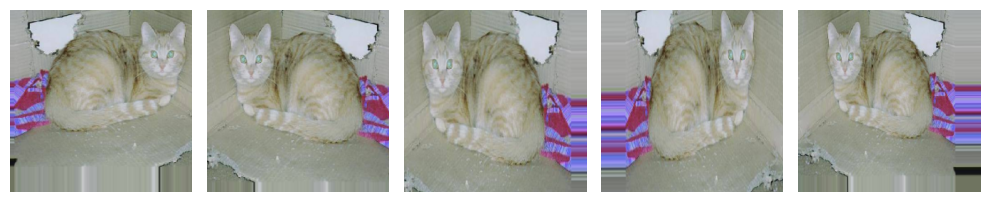

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)] # 첫 번째 배치에서 첫 번째 이미지
plotImages(augmented_images)

In [ ]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


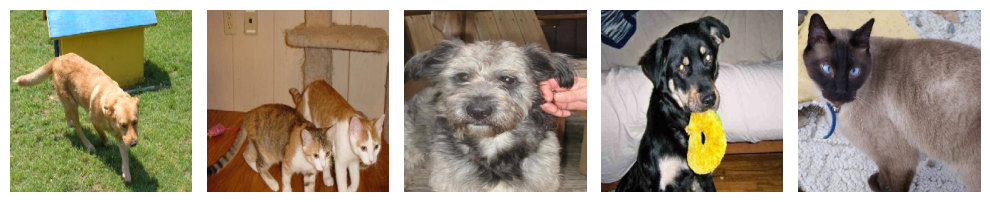

In [ ]:
sample_training_images, _ = next(val_data_gen) # 생성기에서 다음 배치를 가져옵니다. 이 반환값은 (이미지 배치, 레이블 배치) 형태의 튜플입니다.
plotImages(sample_training_images[:-1])

In [ ]:
_[:5] # 정답 데이터

array([1., 0., 1., 1., 0.], dtype=float32)

In [ ]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.
from tensorflow.keras import utils
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Activation

input_layer = Input(shape=(256, 256, 3))

x = Conv2D(64, (3, 3), padding='same')(input_layer)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(256, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(512, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(512, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

x = Dense(4096)(x)
x = Activation('relu')(x)

x = Dense(4096)(x)
x = Activation('relu')(x)

x = Dense(1)(x)
out_layer = Activation('sigmoid')(x)

model = Model(inputs=[input_layer], outputs=[out_layer])
model.summary()
#utils.plot_model(model, show_shapes=True)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 activation_16 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 activation_17 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                           

In [ ]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [ ]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 75s 410ms/step - loss: 2197623.0000 - binary_accuracy: 0.5080 - val_loss: 2.7997 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 48s 381ms/step - loss: 0.8429 - binary_accuracy: 0.5040 - val_loss: 0.7008 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 49s 388ms/step - loss: 1.0149 - binary_accuracy: 0.5100 - val_loss: 0.8684 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 48s 385ms/step - loss: 9.1678 - binary_accuracy: 0.4810 - val_loss: 9.4151 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 48s 385ms/step - loss: 11.8963 - binary_accuracy: 0.4940 - val_loss: 0.6952 - val_binary_accuracy: 0.5000


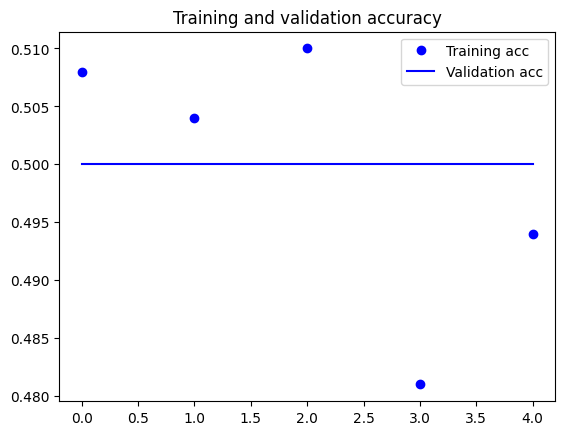

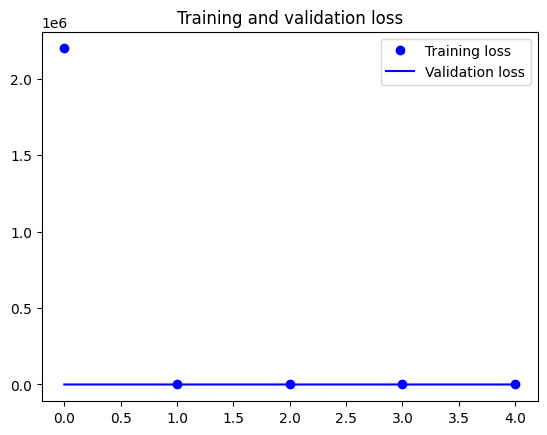

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 문제 1-2. hyperparameter 설정
# parameter Initialization
batch_size = 16
epochs = 20
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [ ]:
# 문제 1-2. 데이터 generator 생성
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.3,
                                     height_shift_range=0.3,
                                     zoom_range=0.4,
                                     horizontal_flip=True,
                                     vertical_flip=False)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
# 문제 1-2. 모델 구현[전이학습]
from keras.models import Model
from keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Input, Activation, BatchNormalization
from keras import regularizers
from keras.applications import VGG16
# Regularization strength
l2_strength = 0.0

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output

# The following lines are your custom layers
x = Flatten()(x)

x = Dense(4096, kernel_regularizer=regularizers.l2(l2_strength))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Activation('relu')(x)

x = Dense(4096, kernel_regularizer=regularizers.l2(l2_strength))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Activation('relu')(x)

x = Dense(1, kernel_regularizer=regularizers.l2(l2_strength))(x)
out_layer = Activation('sigmoid')(x)

model = Model(inputs=base_model.input, outputs=out_layer)
model.summary()

# hyperparameter 변경 => 의미 없음 0.51
# 데이터 증강 => 의미 없음 0.56
# 모델 수정 => Conv2D(1024) 추가 의미없음 0.53
# optimizer 변경 => RMSpop 의미없음 0.54
# skip connection => 의미없음 0.50
# pre-trained model => 빙고 0.92

# [참고 skip connection 모델]
# from keras.models import Model
# from keras.layers import Add, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Input, Activation, BatchNormalization
# from keras import regularizers
# # Regularization strength
# l2_strength = 0.001

# input_layer = Input(shape=(256, 256, 3))

# x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(input_layer)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x_shortcut1 = x
# x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Add()([x, x_shortcut1])
# x = MaxPooling2D(pool_size=(2, 2))(x)

# x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x_shortcut2 = x
# x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Add()([x, x_shortcut2])
# x = MaxPooling2D(pool_size=(2, 2))(x)

# x = Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x_shortcut3 = x
# x = Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Add()([x, x_shortcut3])
# x = MaxPooling2D(pool_size=(2, 2))(x)

# x = Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x_shortcut4 = x
# x = Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Add()([x, x_shortcut4])
# x = MaxPooling2D(pool_size=(2, 2))(x)

# x = Conv2D(1024, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x_shortcut5 = x
# x = Conv2D(1024, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Conv2D(1024, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Add()([x, x_shortcut5])
# x = MaxPooling2D(pool_size=(2, 2))(x)

# x = Flatten()(x)

# x = Dense(4096, kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)
# x = Activation('relu')(x)

# x = Dense(4096, kernel_regularizer=regularizers.l2(l2_strength))(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)
# x = Activation('relu')(x)

# x = Dense(1, kernel_regularizer=regularizers.l2(l2_strength))(x)
# out_layer = Activation('sigmoid')(x)

# model = Model(inputs=[input_layer], outputs=[out_layer])
# model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [ ]:
# 모델 학습
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # decrease the learning rate after 10 epochs

lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

callbacks_list = [early_stopping, lr_scheduler]

history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      callbacks=callbacks_list,
      validation_freq=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20
125/125 [==============================] - 56s 336ms/step - loss: 1.7172 - binary_accuracy: 0.7505 - val_loss: 2.2935 - val_binary_accuracy: 0.8730 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/20
125/125 [==============================] - 39s 313ms/step - loss: 0.8220 - binary_accuracy: 0.8340 - val_loss: 0.8151 - val_binary_accuracy: 0.8940 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/20
125/125 [==============================] - 50s 399ms/step - loss: 0.5115 - binary_accuracy: 0.8600 - val_loss: 0.4311 - val_binary_accuracy: 0.8910 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/20
125/125 [==============================] - 41s 331ms/step - loss: 0.3942 - binary_accuracy: 0.8795 - val_loss: 0.3343 - val_binary_accuracy: 0.9050 - lr: 0.0

In [ ]:
steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size
print(steps_per_epoch)

125.0


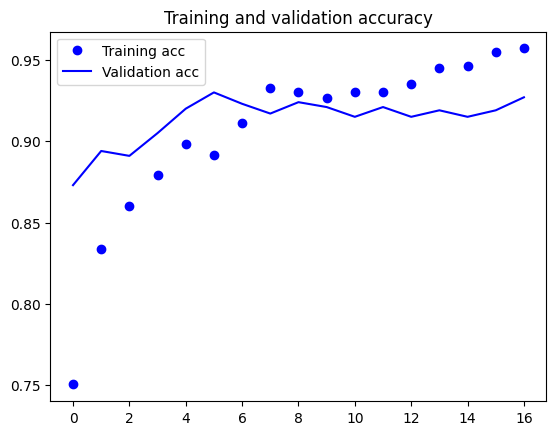

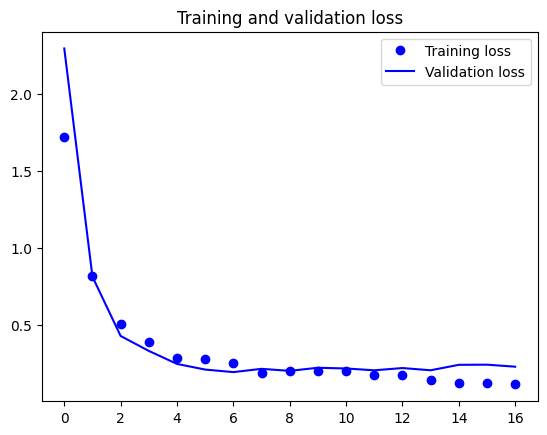

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()